# Starting Off

Imagine you are a financial analyst who wants to try and predict the price of a stock (Apple for example) two days from now. What pieces of information(features) whould you think woudl be helpful in trying to forecast the price of the stock?

Which of those features do you think would be most informative about the price after two days?



# Working with Time Series data: 

## Agenda:
- Working with time series data in pandas
- Components of time series data
- Stationarity

Goals:

- Explain how time series data is different from normal regression problems.
- Make time series data stationary


# Time Series Basics
According to <a href='https://en.wikipedia.org/wiki/Time_series'>wikipedia</a>, a time series is "a series of data points indexed in time order." The goal of time series analysis is to predict future values based on past behavior. 

This differs from other analyses that compare $x$ to $y$, since $x$ is not really a variable. For example, if I measure the boiling point of water with 1%, 3%, 5% and 7% salt solutions, I should be able to predict the boiling point at 4%. But with time series, we can't go back and "plug in" a new value of $x$, since we can never go back in time. For this reason, a time series with one $y$ variable is called <em>univariate</em>. 

By the end of this course you will understand the following code, and be able to create your own time series plots.

**Question:** Come up with at least three examples of data you think is time series data.

## What are "endog" and "exog"?
The data seen in a time series is described as either <em>endogenous</em>, that is, caused by factors within the system, or <em>exogenous</em>, caused by factors outside the system. We'll see that many statsmodels tools use <tt>endog</tt> to represent the incoming time series data in place of the constant <tt>y</tt>.<br>
For more information, visit http://www.statsmodels.org/stable/endog_exog.html

**Question:** Why can't we use linear regression techniques to forecast for times Seriese data?


There are four principal assumptions which justify the use of linear regression models for purposes of inference or prediction:

- Linearity and additivity of the relationship between dependent and independent variables:

- Statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)

-  Homoscedasticity (constant variance) of the errors

- Normality of the error distribution.

### Working with Time Series Data in Pandas

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm


In [4]:
df=pd.read_csv('./resources/Sales_Data.csv', sep='\t', index_col=0)
df.head(15)

,purchase_date,payment_amount
ID,,
1003459795,2010-01-01 00:00:00,1779.0
1003462096,2010-01-03 00:00:00,2374.0
1003464028,2010-01-04 00:00:00,1449.0
1003464770,2010-01-04 00:00:00,2204.0
1003464895,2010-01-04 00:00:00,450.0
1003464932,2010-01-04 00:00:00,1449.0
1003466632,2010-01-04 00:00:00,1304.0
1003467377,2010-01-04 00:00:00,1334.1
1003468224,2010-01-05 00:00:00,1779.0


In [5]:
df.dtypes

purchase_date      object
payment_amount    float64
dtype: object

#### Turn the purchase data into a datetime stamp

In [6]:
df['purchase_date']= pd.to_datetime(df['purchase_date']) 

In [7]:
df.dtypes

purchase_date     datetime64[ns]
payment_amount           float64
dtype: object

***This data was for sales of tutoring programs and books. The client was only concerned  with sales of programs, so we removed all sales less than $100 to separate out the books.***

In [8]:
df = df[df['payment_amount']>100]


In [9]:
df.head(20)

,purchase_date,payment_amount
ID,,
1003459795,2010-01-01,1779.0
1003462096,2010-01-03,2374.0
1003464028,2010-01-04,1449.0
1003464770,2010-01-04,2204.0
1003464895,2010-01-04,450.0
1003464932,2010-01-04,1449.0
1003466632,2010-01-04,1304.0
1003467377,2010-01-04,1334.1
1003468224,2010-01-05,1779.0


### Aggregating our time series data

Above you see we have multiple entries for the same day. Each entry corresponds to a sale made that day. Can we leave the data as is or should we transform it somehow? 

If you believe we shoud transform it, explain how.

In [10]:
daily_sales = df.groupby(['purchase_date'])['payment_amount'].sum()

In [11]:
daily_sales.head()

purchase_date
2010-01-01      6456.0
2010-01-02     37953.1
2010-01-03     59445.4
2010-01-04    142296.7
2010-01-05    117510.4
Name: payment_amount, dtype: float64

### Plotting our Time Series Data

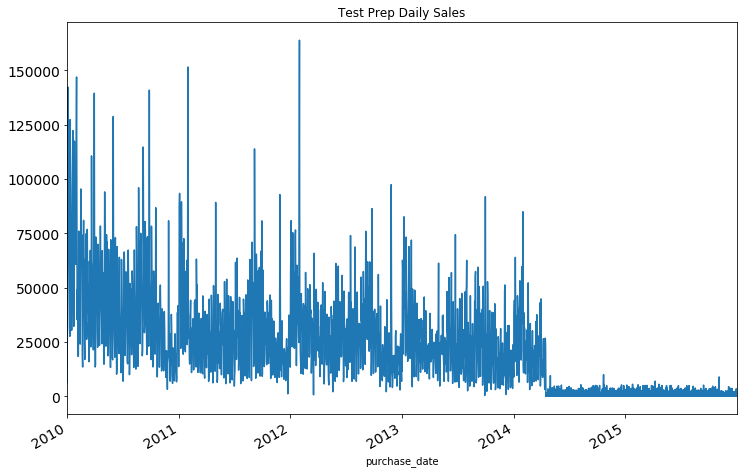

In [12]:
daily_sales.plot(figsize=(12,8), title= 'Test Prep Daily Sales', fontsize=14)

## Resampling to the Period Frequency


A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [11]:
monthly_sales = daily_sales.resample('m').sum()

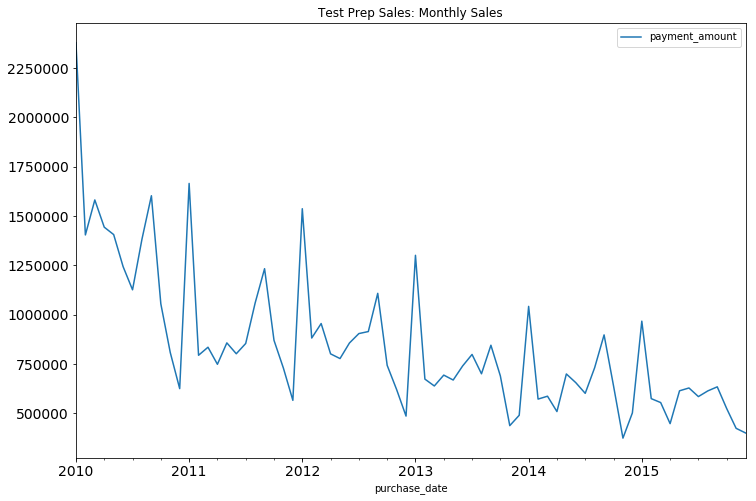

In [12]:
monthly_sales = pd.DataFrame(monthly_sales, columns=['payment_amount'])
monthly_sales.plot(figsize=(12,8), title= 'Test Prep Sales: Monthly Sales', fontsize=14)

# Time Shifting

Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood. This isn't something we'll do often in the course, but it's definitely good to know about this anyways!

## .shift() forward
This method shifts the entire date index a given number of rows, without regard for time periods (months & years).<br>It returns a modified copy of the original DataFrame.

In [13]:
monthly_sales.shift(1).head()

,payment_amount
purchase_date,
2010-01-31,NaN
2010-02-28,2378448.95
2010-03-31,1404627.65
2010-04-30,1581992.57
2010-05-31,1443978.55


## .shift() backwards

In [14]:
monthly_sales.shift(-1).tail()

,payment_amount
purchase_date,
2015-08-31,634805.91
2015-09-30,524765.27
2015-10-31,424525.49
2015-11-30,401077.83
2015-12-31,NaN


# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [15]:
# 7 day rolling mean
monthly_sales.rolling(window=12).mean().head(20)

,payment_amount
purchase_date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,NaN


### Simple Moving Average (SMA): 

Simple Moving Average (SMA) uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data.

To understand SMA further, lets take an example, a sequence of n values:
    
<img src='https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1562792619/pandas1_exporv.png' />

Then the equally weighted rolling average for n data points will be essentially the mean of the previous M data-points, where M is the size of the sliding window:

<img src= 'https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1562792619/pandas2_m0swmk.png'/>

In [16]:
monthly_sales.head()

,payment_amount
purchase_date,
2010-01-31,2378448.95
2010-02-28,1404627.65
2010-03-31,1581992.57
2010-04-30,1443978.55
2010-05-31,1406408.25


In [24]:
daily_sales.rolling(window=365).mean()

purchase_date
2010-01-01 00:00:00            NaN
2010-01-02 00:00:00            NaN
2010-01-03 00:00:00            NaN
2010-01-04 00:00:00            NaN
2010-01-05 00:00:00            NaN
                          ...     
2015-12-30 16:49:15    1054.914603
2015-12-30 20:26:33    1053.868027
2015-12-30 20:56:36    1056.525562
2015-12-30 21:38:40    1058.942000
2015-12-30 22:11:42    1058.996795
Name: payment_amount, Length: 14203, dtype: float64

Why are there missing values at the beginning?

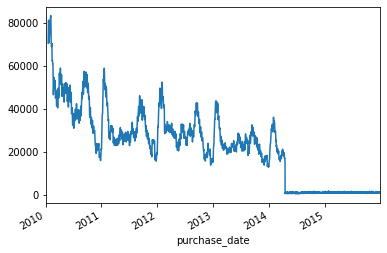

In [27]:
daily_sales.rolling(window=18).mean().plot()

In [20]:
# play with the window of the moving average and see how it affects the graph.

In [21]:
#plot and graph the rolling standard deviation

# EWMA
## Exponentially Weighted Moving Average 

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>.

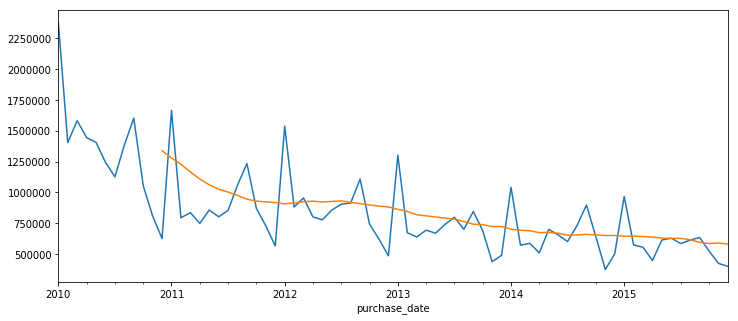

In [22]:
monthly_sales['payment_amount'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
monthly_sales.rolling(window=12).mean()['payment_amount'].plot();

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows).

### Components of Time Series Data
A time series in general is supposed to be affected by four main components, which can be separated from the observed data. These components are: *Trend, Cyclical, Seasonal and Irregular* components.

- **Trend** : The long term movement of a time series. For example, series relating to population growth, number of houses in a city etc. show upward trend.
- **Seasonality** : Fluctuation in the data set that follow a regular pattern due to outside influences. For example sales of ice-cream increase in summer, or daily web traffic.
- **Cyclical** : When data exhibit rises and falls that are not of fixed period.  Think of business cycles which usually last several years, but where the length of the current cycle is unknown beforehand.
- **Irregrular**: Are caused by unpredictable influences, which are not regular and also do not repeat in a particular pattern. These variations are caused by incidences such as war, strike, earthquake, flood, revolution, etc. There is no defined statistical technique for measuring random fluctuations in a time series.


*Note: Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of fixed period then they are cyclic; if the period is unchanging and associated with some aspect of the calendar, then the pattern is seasonal.*

<Figure size 432x288 with 0 Axes>

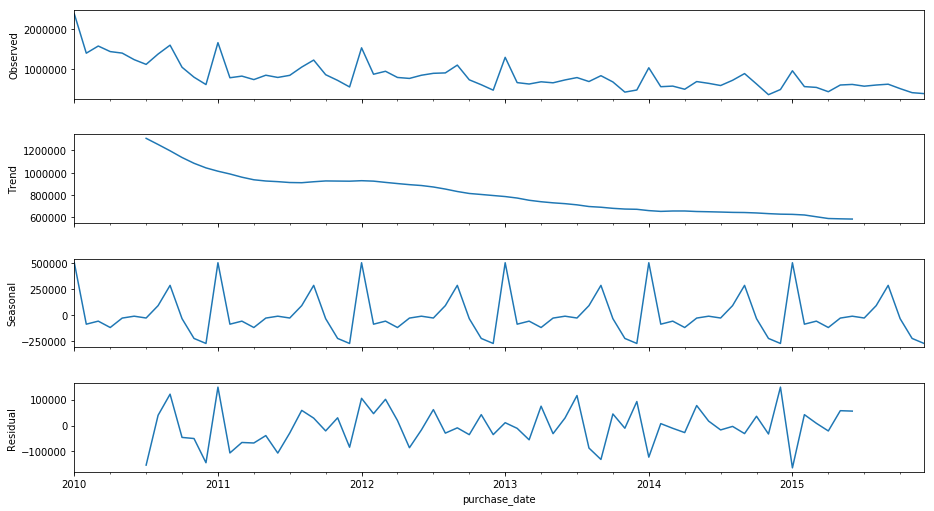

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_sales, freq=12 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

### Statistical stationarity: 

A **stationary time series** is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!  

### Visualizing Homoscedasticity:
    


#### Cosntant Mean

<img src='./resources/Mean_nonstationary.png' />

#### Constant Variance

<img src='./resources/Var_nonstationary.png' />

#### Autocovariance that does not depend on time.

<img src='./resources/Cov_nonstationary.png' />

## Two ways to check for stationarity

1. **Plot rolling Statistics**

    We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.

2. **Dickey-Fuller Test**:
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [70]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [71]:
#test the stationarity of the untransformed dataset
test_stationarity(monthly_sales.payment_amount, 12)

NameError: name 'monthly_sales' is not defined

### How to Stationarize time series data

A series of steps can be taken to stationarize your data - also known -  as removing trends (linear trends, seasonaility/periodicity, etc - more details on transformations <a href='http://people.duke.edu/~rnau/whatuse.htm'>here</a>).

- Log Transofrmation
- Deflating the data
- Differencing 
- Seasonal Differencing

#### Log Transformation

The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

In [72]:
monthly_sales['natural_log'] = monthly_sales.payment_amount.apply(lambda x: np.log(x))  
test_stationarity(monthly_sales.natural_log, 12)

NameError: name 'monthly_sales' is not defined

#### Differencing

Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

#### First Difference

A first difference is the difference between an observation and the previous observation.

In [73]:
monthly_sales['first_difference'] = monthly_sales.payment_amount - monthly_sales.payment_amount.shift(1)  
test_stationarity(monthly_sales.first_difference.dropna(inplace=False),12)

NameError: name 'monthly_sales' is not defined

#### Seasonal Difference

A seasonal difference is the difference between an observation and the previous observation from the same season.

In [74]:
monthly_sales['seasonal_difference'] = monthly_sales.payment_amount - monthly_sales.payment_amount.shift(12)  


NameError: name 'monthly_sales' is not defined

In [75]:
test_stationarity(monthly_sales.seasonal_difference.dropna(inplace=False), 12)

NameError: name 'monthly_sales' is not defined

#### Seasonal Difference of the First Difference

We can do both a first difference and a season difference.

In [76]:
monthly_sales['seasonal_first_difference'] = monthly_sales.first_difference - monthly_sales.first_difference.shift(12)  
test_stationarity(monthly_sales.seasonal_first_difference.dropna(inplace=False), 12)

NameError: name 'monthly_sales' is not defined

#### Season Difference of the log first difference

Let's through in a log transformation as well.  

In [77]:
monthly_sales['log_first_difference'] = monthly_sales.natural_log - monthly_sales.natural_log.shift(1)  
monthly_sales['log_seasonal_first_difference'] = monthly_sales.log_first_difference - monthly_sales.log_first_difference.shift(12)  

test_stationarity(monthly_sales.log_first_difference.dropna(inplace=False), 12)


NameError: name 'monthly_sales' is not defined

Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. The number of times we have to difference our data is the order of differencing - we will use this information when building our model.

### Running a linear regression model with stationary time series data

You can take your newly stationary data and use it as your target variable for a linear regression model. 

Making your data stationary tries to remove the correlation between serial time points. There still can be soem element of time that can explain changes in your target variable. A leap year, for example, will add an extra day for sales in February.  

1. How should we account for this in our linear regression model?
2. What are other time components that we might want to account for in a linear regression model? (think about other examples of hourly, daily, or weekly data)

***When performing a linear regression model on time series data, you need to eventually transformyour data back to the original scale***

## Practice:

Take the following time series data and try to make it as stationary as possible. 

In [113]:
df_transit = pd.read_csv('./resources/portland-oregon-average-monthly-.csv', index_col=0)
df_transit.head()

,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630


In [114]:
df_transit.reset_index()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [117]:
df_transit['Month']

KeyError: 'Month'

In [115]:
df_transit['Month'] = df_transit['Month'].to_datetime

KeyError: 'Month'

In [93]:
df_transit.columns = ['riders']

In [94]:
df_transit.head()

,riders
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630


In [95]:
df_transit.tail(1)

,riders
Month,
Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982,n=114


In [96]:
df_transit.drop(df_transit.index[114], inplace=True)

In [97]:
df_transit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 1960-01 to 1969-06
Data columns (total 1 columns):
riders    114 non-null object
dtypes: object(1)
memory usage: 1.8+ KB


In [98]:
df_transit['riders']=df_transit['riders'].apply(lambda x: int(x))

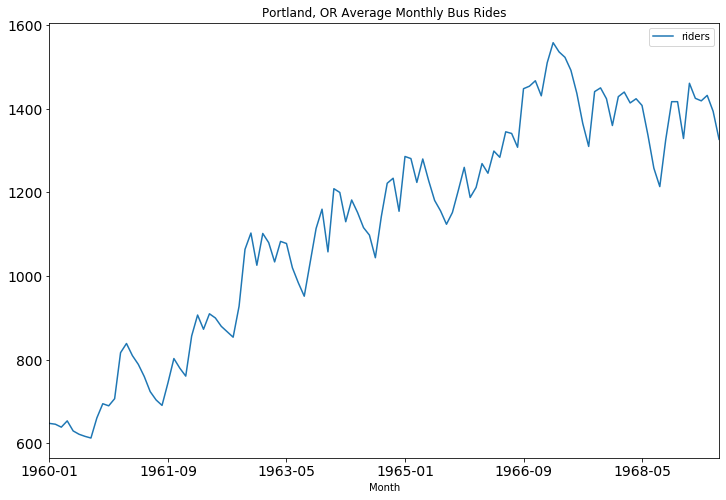

In [101]:
# Plot a graph of the data to see what it looks like over time
df_transit.plot(figsize=(12,8), title= 'Portland, OR Average Monthly Bus Rides', fontsize=14)

#### Does the data appear to be stationary? Why or Why not?

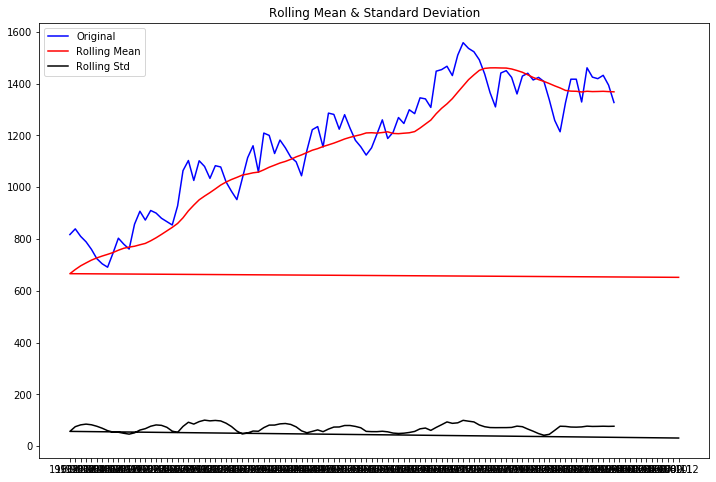

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [106]:
# Call the stationarity function on the data
test_stationarity(df_transit['riders'], 12)

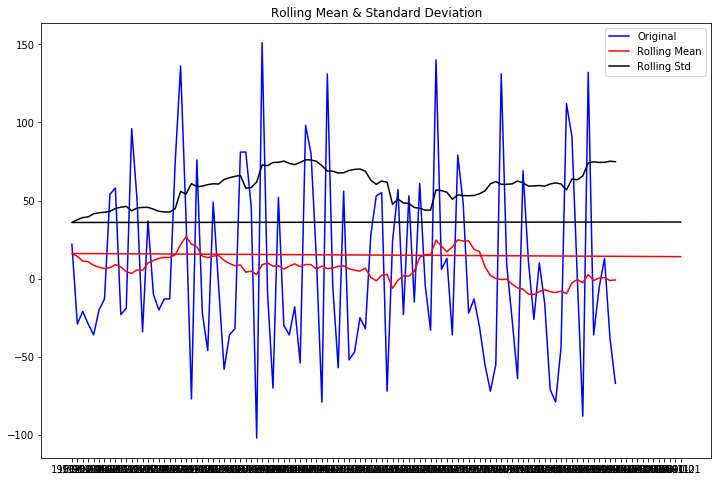

Results of Dickey-Fuller Test:
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [107]:
# Execute at least two different transformations 
df_transit['first_difference'] = df_transit['riders'] - df_transit['riders'].shift(1)  
test_stationarity(df_transit['first_difference'].dropna(inplace=False),12)

# to try and make the data more stationary

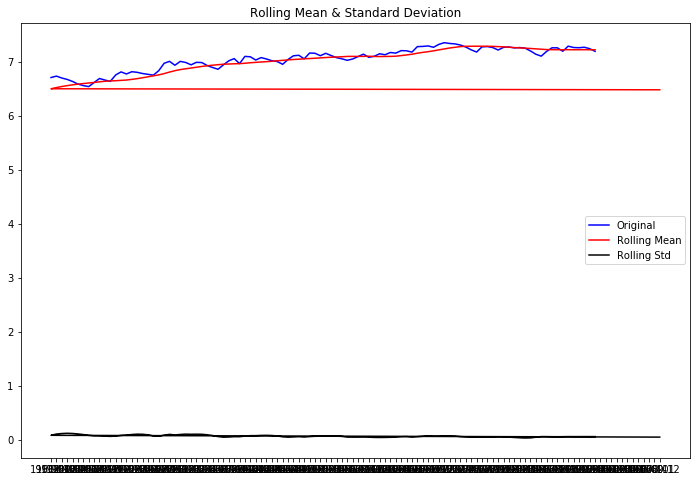

Results of Dickey-Fuller Test:
Test Statistic                  -1.677830
p-value                          0.442570
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [108]:
df_transit['natural_log'] = df_transit['riders'].apply(lambda x: np.log(x))  
test_stationarity(df_transit['natural_log'], 12)

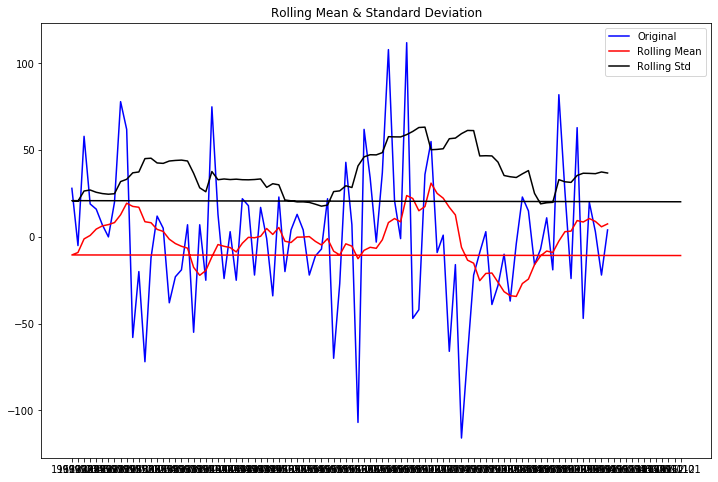

Results of Dickey-Fuller Test:
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [109]:
df_transit['seasonal_first_difference'] = df_transit.first_difference - df_transit.first_difference.shift(12)  
test_stationarity(df_transit.seasonal_first_difference.dropna(inplace=False), 12)

What transofrmation made your data set more stable?